In [1]:
import numpy as np
import pandas as pd
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
reviews = pd.read_csv("imdbReviews.csv")

In [3]:
reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [4]:
reviews.shape

(2000, 4)

In [5]:
reviews.keys()

Index(['Index', 'URL', 'Text', 'Sentiment'], dtype='object')

In [6]:
reviews["Sentiment"].value_counts()

Sentiment
POS    1000
NEG    1000
Name: count, dtype: int64

In [7]:
# Change labels to numerical (0s and 1s)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews["Sentiment"])
print(label[:10])
print(reviews["Sentiment"][:10])

[1 1 1 1 1 1 1 1 1 1]
0    POS
1    POS
2    POS
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    POS
Name: Sentiment, dtype: object


In [8]:
reviews = reviews.astype({"Text":"string"})

In [9]:
text = reviews["Text"]
text[:5]

0    Girlfight follows a project dwelling New York ...
1    Hollywood North is an euphemism from the movie...
2    That '70s Show is definitely the funniest show...
3    9/10- 30 minutes of pure holiday terror. Okay,...
4    A series of random, seemingly insignificant th...
Name: Text, dtype: string

In [10]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('','', string.punctuation))
    #remove digits and numbers
    review = review.translate(str.maketrans('','', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)

text1[:5]

['girlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more although the film is not about boxing boxing is all about the film so much so you can almost smell the sweat technically and artistically a good shoot with an sense of honesty and reality about it girlfight is no chick flick and no rocky it is rather a very human drama which even viewers who dont know boxing will be able to connect withgirlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more',
 'hollywood north is an euphemism from the movie industry as they went to canada to make movies because of tax breaks and cheaper costs in a civilized city like toronto in this case later in vancouver peter obrian the director probably saw a lot of the invaders from california that this movie seems to be the right 

In [11]:
text1 = pd.Series(text1)
text1[:5]

0    girlfight follows a project dwelling new york ...
1    hollywood north is an euphemism from the movie...
2    that s show is definitely the funniest show cu...
3      minutes of pure holiday terror okay so its n...
4    a series of random seemingly insignificant the...
dtype: object

In [12]:
#remove stop words

#Setting English stopwords
stop_words = set(stopwords.words("english"))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:5]

0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism movie industry went ...
2    show definitely funniest show currently tv sta...
3    minutes pure holiday terror okay scary sure fu...
4    series random seemingly insignificant thefts s...
dtype: object

In [13]:
#apply lemmatising
from nltk.stem import WordNetLemmatizer

#Init
lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5]

0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism movie industry went ...
2    show definitely funniest show currently tv sta...
3    minute pure holiday terror okay scary sure fun...
4    series random seemingly insignificant theft si...
dtype: object

In [14]:
#apply lemmatizing with POS tags

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J" : wordnet.ADJ,
        "N" : wordnet.NOUN,
        "V" : wordnet.ADJ,
        "R" : wordnet.ADV
    }

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizier = WordNetLemmatizer()
text3 = text1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5]

0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism movie industry went ...
2    show definitely funniest show currently tv sta...
3    minute pure holiday terror okay scary sure fun...
4    series random seemingly insignificant theft si...
dtype: object

In [15]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame(reviews1, columns = ["Review", "Sentiment"])
reviewsP

,Review,Sentiment
0,girlfight follows project dwelling new york hi...,1
1,hollywood north euphemism movie industry went ...,1
2,show definitely funniest show currently tv sta...,1
3,minute pure holiday terror okay scary sure fun...,1
4,series random seemingly insignificant theft si...,1
...,...,...
1995,tourist head ireland school trip learn druid e...,0
1996,two film useful scaring people god event horiz...,0
1997,ulises literature teacher arrives coastal town...,0
1998,um okay guess get whole shakycam gorillastyle ...,0


In [16]:
#transform text into BoW with count features
cv=CountVectorizer()

cv_reviews = cv.fit_transform(reviewsP["Review"])

cv.get_feature_names_out()

array(['aa', 'aaa', 'aadha', ..., 'ís', 'ísnt', 'øif'], dtype=object)

In [17]:
print(cv_reviews)

  (0, 11229)	2
  (0, 10372)	2
  (0, 21349)	2
  (0, 8092)	2
  (0, 18455)	2
  (0, 30624)	2
  (0, 12591)	2
  (0, 23761)	2
  (0, 11228)	2
  (0, 24161)	3
  (0, 10859)	2
  (0, 30351)	2
  (0, 867)	2
  (0, 3192)	5
  (0, 10082)	2
  (0, 24065)	2
  (0, 8919)	2
  (0, 21609)	2
  (0, 17978)	3
  (0, 844)	1
  (0, 9927)	2
  (0, 789)	1
  (0, 25066)	1
  (0, 26656)	1
  (0, 26988)	1
  :	:
  (1999, 19179)	1
  (1999, 26029)	3
  (1999, 15863)	1
  (1999, 1978)	1
  (1999, 27334)	2
  (1999, 250)	1
  (1999, 6950)	1
  (1999, 23113)	1
  (1999, 1689)	3
  (1999, 28187)	3
  (1999, 9137)	1
  (1999, 20428)	2
  (1999, 15785)	1
  (1999, 20205)	1
  (1999, 19990)	2
  (1999, 28670)	2
  (1999, 3160)	1
  (1999, 14668)	2
  (1999, 26202)	2
  (1999, 17267)	2
  (1999, 18450)	1
  (1999, 15224)	1
  (1999, 5628)	1
  (1999, 3772)	1
  (1999, 23860)	1


In [19]:
cv_reviews.shape

(2000, 30827)

In [20]:
df = pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aa,aaa,aadha,aag,aames,aamess,aap,aapke,aardman,aaron,...,zwick,zyuranger,zz,zzzzzzzzas,½th,ème,éme,ís,ísnt,øif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
cv=CountVectorizer(max_features=10000)

cv_reviews = cv.fit_transform(reviewsP["Review"])

cv_reviews.shape

(2000, 10000)

In [23]:
#Transform text into Tfidf representations
tv=TfidfVectorizer()

tv_reviews = tv.fit_transform(reviewsP["Review"])

print(tv.get_feature_names_out())

['aa' 'aaa' 'aadha' ... 'ís' 'ísnt' 'øif']


In [24]:
tv_reviews.shape

(2000, 30827)

In [25]:
print(tv_reviews[0])

  (0, 30211)	0.130751317682835
  (0, 5426)	0.11003873245577815
  (0, 47)	0.06955575673649288
  (0, 15086)	0.04199424569280431
  (0, 7657)	0.03875019210454927
  (0, 29281)	0.06111000958839087
  (0, 8997)	0.03482186065888692
  (0, 7795)	0.06590728171684726
  (0, 13093)	0.06376103846514887
  (0, 21948)	0.05663149233133696
  (0, 23090)	0.10588361960086255
  (0, 10246)	0.06727164495166942
  (0, 4474)	0.0896670566858557
  (0, 22051)	0.07017973731342568
  (0, 12872)	0.10112722146825293
  (0, 24558)	0.07964549649741916
  (0, 11397)	0.032626608594429174
  (0, 1501)	0.11560180388494538
  (0, 26988)	0.10588361960086255
  (0, 26656)	0.10783098811804052
  (0, 25066)	0.10783098811804052
  (0, 789)	0.05380495766090924
  (0, 9927)	0.04745571975833939
  (0, 844)	0.05537289946905542
  (0, 17978)	0.11154041661058522
  (0, 21609)	0.15573196489264812
  (0, 8919)	0.24809510206609475
  (0, 24065)	0.16162610732409274
  (0, 10082)	0.09206828378800878
  (0, 3192)	0.5629369312532508
  (0, 867)	0.1907369695251555

In [26]:
#to filter by tf value and keep a certain number of features use max_features
tv=TfidfVectorizer(max_features=10000)

tv_reviews=tv.fit_transform(reviewsP["Review"])

tv_reviews.shape

(2000, 10000)

In [28]:
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n = 10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]]

print([get_top_tf_idf_words(tv_reviews, 10)])

[array(['movie', 'film', 'one', 'like', 'bad', 'time', 'good', 'really',
       'well', 'story'], dtype=object)]


In [29]:
df1 = pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

df1["movie"].describe()

count    2000.000000
mean        0.058211
std         0.069514
min         0.000000
25%         0.000000
50%         0.032624
75%         0.094944
max         0.530520
Name: movie, dtype: float64

<Axes: >

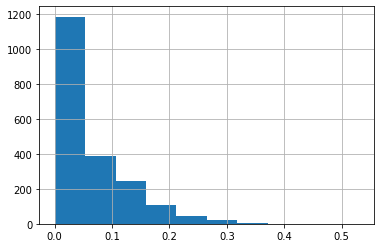

In [30]:
df1["movie"].hist()